## Softmax In One Dimension

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader

In [17]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [18]:
torch.manual_seed(0)

# Make Some Data

Create some linearly seperable data with three classes:

In [19]:
from torch.utils.data import Dataset
class data(Dataset):
    def __init__(self):
        self.x = torch.arange(-2,2,0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x>1.0)[:,0]*(self.x<1.0)[:,0]] = 1
        self.y[(self.x>=1.0)[:,0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

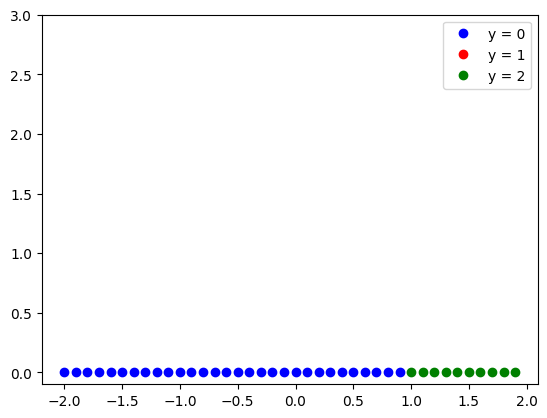

In [20]:
data_set = data()
data_set.x
plot_data(data_set)

# Build a Softmax Classifier

In [21]:
model = nn.Sequential(nn.Linear(1,3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0075],
                      [ 0.5364],
                      [-0.8230]])),
             ('0.bias', tensor([-0.7359, -0.3852,  0.2682]))])

# Train the model

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
trainloader = DataLoader(dataset=data_set,batch_size=5)

In [23]:
Loss = []
def train_model(epochs):
    for epoch in range(epochs):
        if epoch % 50 == 0:
            pass
        plot_data(data_set, model)
    for x,y in trainloader:
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat,y)
        loss.backward()
        optimizer.step()
    train_model(300)

In [24]:
Loss

[]

In [25]:
z = model(data_set.x)
_,yhat = z.max(1)
print("the prediction is",yhat)

the prediction is tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


In [33]:
correct = (data_set.y == yhat).sum().item()
accuracy = correct / data_set.len
print("the accuracy is",accuracy)

the accuracy is 0.0


In [34]:
Softmax_fn = nn.Softmax(dim=-1)

In [28]:
probability = Softmax_fn(z)

In [32]:
for i in range(3):
    print("probability of class {} is given by  {}".format(i, probability[0,i]) )

probability of class 0 is given by  0.06483069062232971
probability of class 1 is given by  0.031022194772958755
probability of class 2 is given by  0.9041470885276794


## Applying Softmax function to classify handwritten digits

In [36]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### To plot out the parameters of Softmax function

In [93]:
import matplotlib.pyplot as plt

def PlotParameters(model): 
    # Search for the key containing 'weight'
    weight_key = None
    for key in model.state_dict().keys():
        if 'weight' in key.lower():
            weight_key = key
            break
    
    if weight_key is None:
        raise KeyError("No key containing 'weight' found in model.state_dict().")

    # Extract the weights
    W = model.state_dict()[weight_key].data
    w_min = W.min().item()
    w_max = W.max().item()

    # Create subplots
    num_classes = W.size(0)  # Number of rows corresponds to the number of classes
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    # Iterate over the classes
    for i, ax in enumerate(axes):
        if i < num_classes:
            # Set the label for the sub-plot
            ax.set_title(f"Class: {i}")

            # Plot the image
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            # Remove ticks
            ax.set_xticks([])
            ax.set_yticks([])

    # Show the plot
    plt.show()


In [94]:
# Plot the data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

In [95]:
train_dataset = dasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
print("the training data is given by",train_dataset)

the training data is given by Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [96]:
val_dataset = dasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
print("the validation data is given by",val_dataset)

the validation data is given by Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [97]:
print("datatype of dataset is",type(train_dataset[0][1]))

datatype of dataset is <class 'int'>


In [98]:
print("the labels",train_dataset[3][1])

the labels 1


the image None


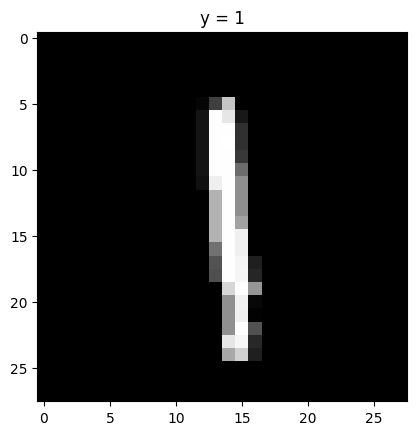

In [99]:
print("the image",show_data(train_dataset[8]))

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements">


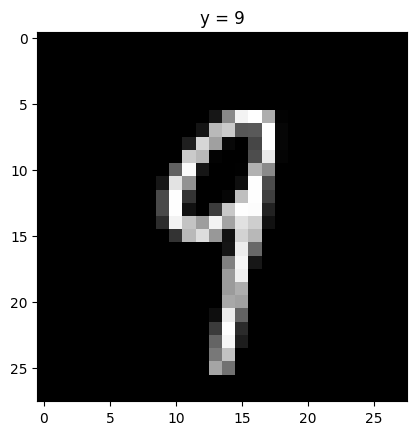

In [100]:
show_data(train_dataset[900])

## Build a Softmax Classifier

In [101]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [102]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [103]:
input_dime = 28*28
output_dime = 10
model = SoftMax(input_dime,output_dime)
print("the model:\n",model)

the model:
 SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [104]:
print("W:",list(model.parameters())[0].size())
print("b:",list(model.parameters())[1].size())

W: torch.Size([10, 784])
b: torch.Size([10])


In [105]:
print(model.state_dict().keys())


odict_keys(['linear.weight', 'linear.bias'])


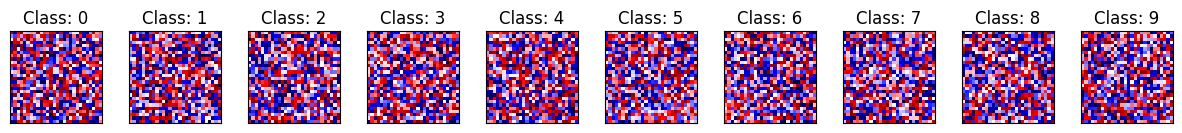

In [106]:
PlotParameters(model)

In [107]:
learning_rate = 0.1

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=5000)

In [110]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(val_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in val_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

train_model(n_epochs)

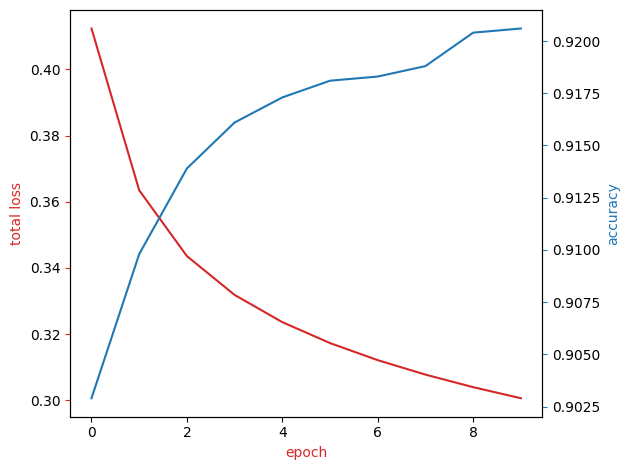

In [111]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

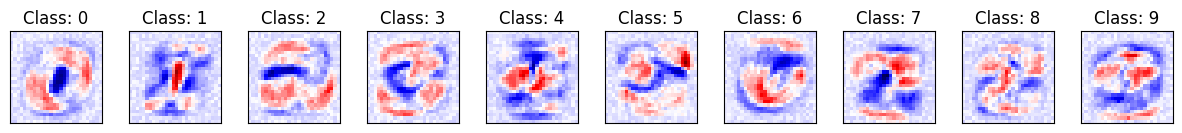

In [112]:
PlotParameters(model)

### We Plot the first five misclassified  samples and the probability of that class.


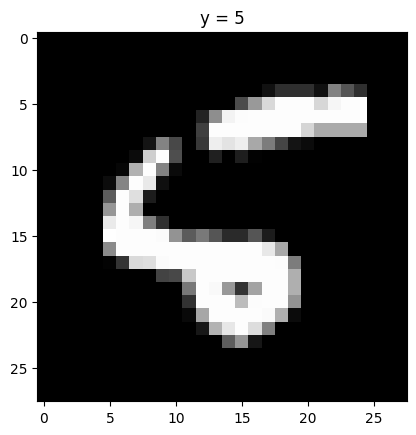

yhat: tensor([6])
probability of class  0.9907338619232178


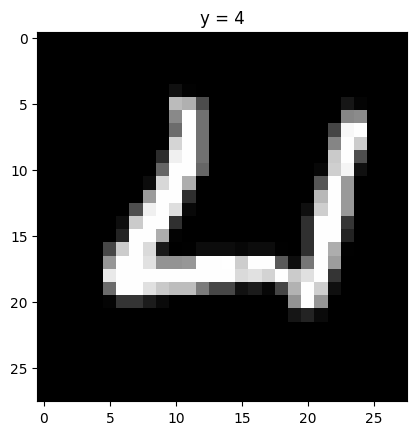

yhat: tensor([6])
probability of class  0.4457681179046631


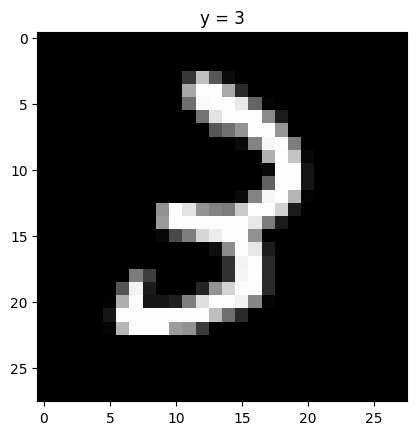

yhat: tensor([2])
probability of class  0.6724461317062378


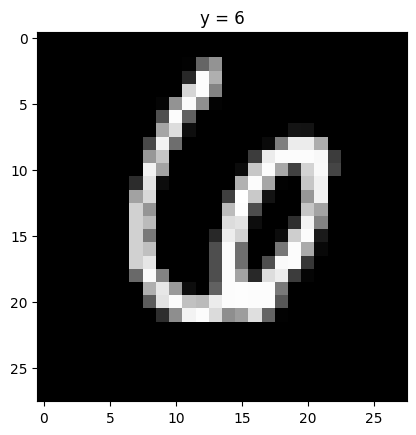

yhat: tensor([7])
probability of class  0.3409827947616577


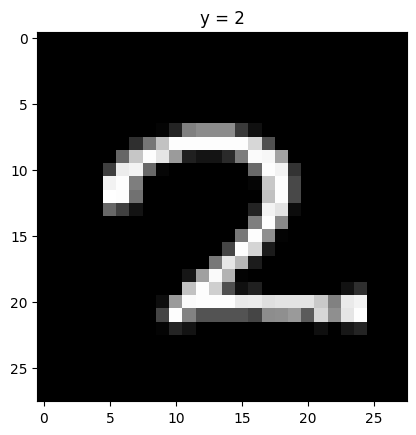

yhat: tensor([7])
probability of class  0.524296760559082


In [113]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in val_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

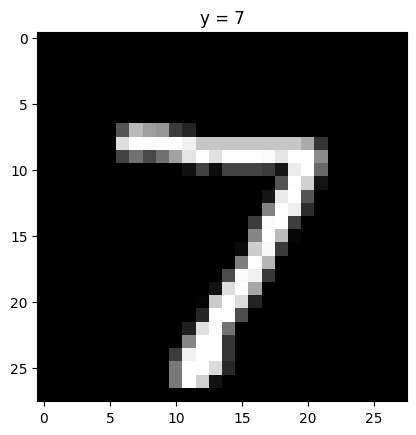

yhat: tensor([7])
probability of class  0.9968008995056152


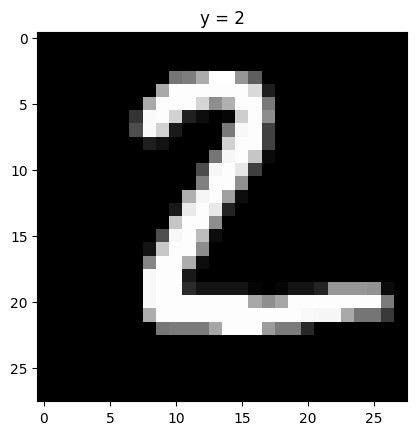

yhat: tensor([2])
probability of class  0.9458906054496765


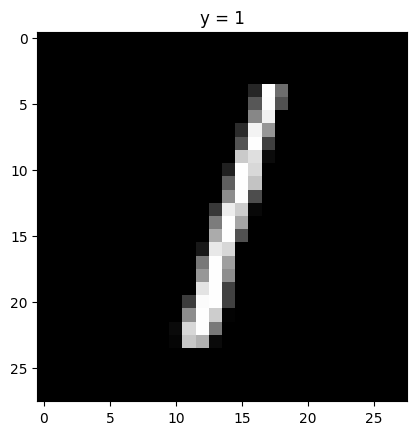

yhat: tensor([1])
probability of class  0.9757120013237


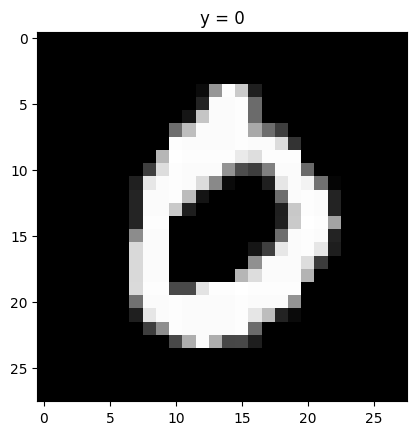

yhat: tensor([0])
probability of class  0.9996142387390137


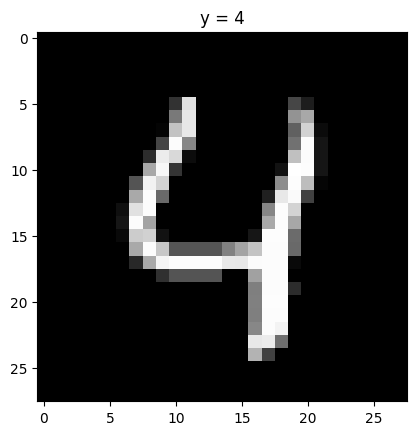

yhat: tensor([4])
probability of class  0.9467741250991821


In [114]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in val_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  